In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
#conda install -c conda-forge mlxtend

In [3]:
movie=pd.read_csv("C:\\Users\\Trupti Kendre\\Downloads\\my_movies.csv")
movie

V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [4]:
movie.shape

(10, 15)

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
movie.corr()

Sixth Sense  Gladiator     LOTR1  Harry Potter1   Patriot  \
Sixth Sense       1.000000   0.356348 -0.102062      -0.102062  0.166667   
Gladiator         0.356348   1.000000 -0.763763      -0.763763  0.801784   
LOTR1            -0.102062  -0.763763  1.000000       0.375000 -0.612372   
Harry Potter1    -0.102062  -0.763763  0.375000       1.000000 -0.612372   
Patriot           0.166667   0.801784 -0.612372      -0.612372  1.000000   
LOTR2            -0.102062  -0.763763  1.000000       0.375000 -0.612372   
Harry Potter2    -0.408248  -0.509175 -0.166667       0.666667 -0.408248   
LOTR              0.272166   0.218218 -0.166667      -0.166667 -0.408248   
Braveheart       -0.408248   0.218218 -0.166667      -0.166667  0.272166   
Green Mile        0.408248  -0.218218  0.375000       0.375000 -0.612372   

                  LOTR2  Harry Potter2      LOTR  Braveheart  Green Mile  
Sixth Sense   -0.102062      -0.408248  0.272166   -0.408248    0.408248  
Gladiator     -0.763763      -0.509175  0.218218    0.218218   -0.218218  
LOTR1          1.000000      -0.166667 -0.166667   -0.166667    0.375000  
Harry Potter1  0.375000       0.666667 -0.166667   -0.166667    0.375000  
Patriot       -0.612372      -0.408248 -0.408248    0.272166   -0.612372  
LOTR2          1.000000      -0.166667 -0.166667   -0.166667    0.375000  
Harry Potter2 -0.166667       1.000000 -0.111111   -0.111111   -0.166667  
LOTR          -0.166667      -0.111111  1.000000   -0.111111    0.666667  
Braveheart    -0.166667      -0.111111 -0.111111    1.000000   -0.166667  
Green Mile     0.375000      -0.166667  0.666667   -0.166667    1.000000

# Pre-Processing

In [8]:
movie2=movie.iloc[:,5:]
movie2

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

# Apriori Algorithm

# i) Association rules with 10% Support and 70% confidence

In [9]:
frequent_itemsets = apriori(movie2, min_support=0.1, use_colnames=True)
frequent_itemsets

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (LOTR1, Harry Potter1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (LOTR1, Green Mile)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter2, Harry Potter1)
26      0.1                        (Harry Potter1, Green Mile)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (LOTR, Green Mile)
30      0.4                  (Patriot, Gladiator, Sixth Sense)
31      0.1                     (LOTR, Gladiator, Sixth Sense)
32      0.1               (Green Mile, Gladiator, Sixth Sense)
33      0.1                (LOTR1, Harry Potter1, Sixth Sense)
34      0.1                        (LOTR1, LOTR2, Sixth Sense)
35      0.1                   (Green Mile, LOTR1, Sixth Sense)
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (Green Mile, LOTR2, Sixth Sense)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (LOTR, Gladiator, Green Mile)
42      0.1                      (LOTR1, LOTR2, Harry Potter1)
43      0.1                 (LOTR1, Harry Potter1, Green Mile)
44      0.1                         (LOTR1, LOTR2, Green Mile)
45      0.1                 (LOTR2, Harry Potter1, Green Mile)
46      0.1         (Green Mile, LOTR, Gladiator, Sixth Sense)
47      0.1         (LOTR1, LOTR2, Harry Potter1, Sixth Sense)
48      0.1    (Green Mile, LOTR1, Harry Potter1, Sixth Sense)
49      0.1            (Green Mile, LOTR2, LOTR1, Sixth Sense)
50      0.1    (Green Mile, LOTR2, Harry Potter1, Sixth Sense)
51      0.1          (LOTR1, LOTR2, Harry Potter1, Green Mile)
52      0.1  (Harry Potter1, Green Mile, Sixth Sense, LOTR2...

In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules


antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
2            (LOTR1)                                    (Sixth Sense)   
3      (Sixth Sense)                                          (LOTR1)   
4    (Harry Potter1)                                    (Sixth Sense)   
..               ...                                              ...   
245  (Harry Potter1)          (LOTR1, LOTR2, Sixth Sense, Green Mile)   
246     (Green Mile)       (LOTR1, LOTR2, Harry Potter1, Sixth Sense)   
247    (Sixth Sense)        (LOTR1, LOTR2, Harry Potter1, Green Mile)   
248          (LOTR2)  (LOTR1, Sixth Sense, Harry Potter1, Green Mile)   
249          (LOTR1)  (LOTR2, Sixth Sense, Harry Potter1, Green Mile)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
2                   0.2                 0.6      0.1    0.500000  0.833333   
3                   0.6                 0.2      0.1    0.166667  0.833333   
4                   0.2                 0.6      0.1    0.500000  0.833333   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.2                 0.1      0.1    0.500000  5.000000   
247                 0.6                 0.1      0.1    0.166667  1.666667   
248                 0.2                 0.1      0.1    0.500000  5.000000   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.40  
1        0.08        1.80  
2       -0.02        0.80  
3       -0.02        0.96  
4       -0.02        0.80  
..        ...         ...  
245      0.08        1.80  
246      0.08        1.80  
247      0.04        1.08  
248      0.08        1.80  
249      0.08        1.80  

[250 rows x 9 columns]

# Sorting Value By Decending Order

In [11]:
rules.sort_values('lift',ascending = False)[0:20]

antecedents  \
212                   (LOTR1, Green Mile)   
196                   (LOTR2, Green Mile)   
168                   (LOTR1, Green Mile)   
211                (LOTR1, Harry Potter1)   
138  (Gladiator, Sixth Sense, Green Mile)   
141               (Gladiator, Green Mile)   
144                   (LOTR, Sixth Sense)   
201          (Harry Potter1, Sixth Sense)   
200                  (LOTR2, Sixth Sense)   
147                                (LOTR)   
197           (Harry Potter1, Green Mile)   
155                (LOTR1, Harry Potter1)   
214                   (LOTR2, Green Mile)   
156                  (LOTR1, Sixth Sense)   
157                (LOTR2, Harry Potter1)   
187                  (LOTR1, Sixth Sense)   
186                  (LOTR2, Sixth Sense)   
183                   (LOTR1, Green Mile)   
182                   (LOTR2, Green Mile)   
158                  (LOTR2, Sixth Sense)   

                              consequents  antecedent support  \
212                (LOTR2, Harry Potter1)                 0.1   
196          (Harry Potter1, Sixth Sense)                 0.1   
168          (Harry Potter1, Sixth Sense)                 0.1   
211                   (LOTR2, Green Mile)                 0.1   
138                                (LOTR)                 0.1   
141                   (LOTR, Sixth Sense)                 0.1   
144               (Gladiator, Green Mile)                 0.1   
201                   (LOTR2, Green Mile)                 0.1   
200           (Harry Potter1, Green Mile)                 0.1   
147  (Gladiator, Sixth Sense, Green Mile)                 0.1   
197                  (LOTR2, Sixth Sense)                 0.1   
155                  (LOTR2, Sixth Sense)                 0.1   
214                (LOTR1, Harry Potter1)                 0.1   
156                (LOTR2, Harry Potter1)                 0.1   
157                  (LOTR1, Sixth Sense)                 0.1   
187                   (LOTR2, Green Mile)                 0.1   
186                   (LOTR1, Green Mile)                 0.1   
183                  (LOTR2, Sixth Sense)                 0.1   
182                  (LOTR1, Sixth Sense)                 0.1   
158                (LOTR1, Harry Potter1)                 0.1   

     consequent support  support  confidence  lift  leverage  conviction  
212                 0.1      0.1         1.0  10.0      0.09         inf  
196                 0.1      0.1         1.0  10.0      0.09         inf  
168                 0.1      0.1         1.0  10.0      0.09         inf  
211                 0.1      0.1         1.0  10.0      0.09         inf  
138                 0.1      0.1         1.0  10.0      0.09         inf  
141                 0.1      0.1         1.0  10.0      0.09         inf  
144                 0.1      0.1         1.0  10.0      0.09         inf  
201                 0.1      0.1         1.0  10.0      0.09         inf  
200                 0.1      0.1         1.0  10.0      0.09         inf  
147                 0.1      0.1         1.0  10.0      0.09         inf  
197                 0.1      0.1         1.0  10.0      0.09         inf  
155                 0.1      0.1         1.0  10.0      0.09         inf  
214                 0.1      0.1         1.0  10.0      0.09         inf  
156                 0.1      0.1         1.0  10.0      0.09         inf  
157                 0.1      0.1         1.0  10.0      0.09         inf  
187                 0.1      0.1         1.0  10.0      0.09         inf  
186                 0.1      0.1         1.0  10.0      0.09         inf  
183                 0.1      0.1         1.0  10.0      0.09         inf  
182                 0.1      0.1         1.0  10.0      0.09         inf  
158                 0.1      0.1         1.0  10.0      0.09         inf

In [12]:
rules[rules.lift>1]

antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
6          (Patriot)                                    (Sixth Sense)   
7      (Sixth Sense)                                        (Patriot)   
10            (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
245  (Harry Potter1)          (LOTR1, LOTR2, Sixth Sense, Green Mile)   
246     (Green Mile)       (LOTR1, LOTR2, Harry Potter1, Sixth Sense)   
247    (Sixth Sense)        (LOTR1, LOTR2, Harry Potter1, Green Mile)   
248          (LOTR2)  (LOTR1, Sixth Sense, Harry Potter1, Green Mile)   
249          (LOTR1)  (LOTR2, Sixth Sense, Harry Potter1, Green Mile)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
6                   0.6                 0.6      0.4    0.666667  1.111111   
7                   0.6                 0.6      0.4    0.666667  1.111111   
10                  0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.2                 0.1      0.1    0.500000  5.000000   
247                 0.6                 0.1      0.1    0.166667  1.666667   
248                 0.2                 0.1      0.1    0.500000  5.000000   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.40  
1        0.08        1.80  
6        0.04        1.20  
7        0.04        1.20  
10       0.04         inf  
..        ...         ...  
245      0.08        1.80  
246      0.08        1.80  
247      0.04        1.08  
248      0.08        1.80  
249      0.08        1.80  

[236 rows x 9 columns]

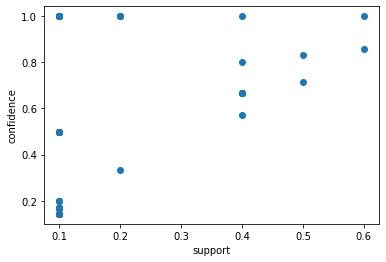

In [13]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# ii) Association rules with 5% Support and 90% Confidence

In [14]:
frequent_itemsets = apriori(movie2, min_support=0.05, use_colnames=True)
frequent_itemsets

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (LOTR1, Harry Potter1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (LOTR1, Green Mile)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter2, Harry Potter1)
26      0.1                        (Harry Potter1, Green Mile)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (LOTR, Green Mile)
30      0.4                  (Patriot, Gladiator, Sixth Sense)
31      0.1                     (LOTR, Gladiator, Sixth Sense)
32      0.1               (Green Mile, Gladiator, Sixth Sense)
33      0.1                (LOTR1, Harry Potter1, Sixth Sense)
34      0.1                        (LOTR1, LOTR2, Sixth Sense)
35      0.1                   (Green Mile, LOTR1, Sixth Sense)
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (Green Mile, LOTR2, Sixth Sense)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (LOTR, Gladiator, Green Mile)
42      0.1                      (LOTR1, LOTR2, Harry Potter1)
43      0.1                 (LOTR1, Harry Potter1, Green Mile)
44      0.1                         (LOTR1, LOTR2, Green Mile)
45      0.1                 (LOTR2, Harry Potter1, Green Mile)
46      0.1         (Green Mile, LOTR, Gladiator, Sixth Sense)
47      0.1         (LOTR1, LOTR2, Harry Potter1, Sixth Sense)
48      0.1    (Green Mile, LOTR1, Harry Potter1, Sixth Sense)
49      0.1            (Green Mile, LOTR2, LOTR1, Sixth Sense)
50      0.1    (Green Mile, LOTR2, Harry Potter1, Sixth Sense)
51      0.1          (LOTR1, LOTR2, Harry Potter1, Green Mile)
52      0.1  (Harry Potter1, Green Mile, Sixth Sense, LOTR2...

In [15]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules

antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
2          (Patriot)                                    (Sixth Sense)   
3      (Sixth Sense)                                        (Patriot)   
4             (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
233  (Harry Potter1)          (LOTR1, LOTR2, Sixth Sense, Green Mile)   
234     (Green Mile)       (LOTR1, LOTR2, Harry Potter1, Sixth Sense)   
235    (Sixth Sense)        (LOTR1, LOTR2, Harry Potter1, Green Mile)   
236          (LOTR2)  (LOTR1, Sixth Sense, Harry Potter1, Green Mile)   
237          (LOTR1)  (LOTR2, Sixth Sense, Harry Potter1, Green Mile)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.2                 0.1      0.1    0.500000  5.000000   
235                 0.6                 0.1      0.1    0.166667  1.666667   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.40  
1        0.08        1.80  
2        0.04        1.20  
3        0.04        1.20  
4        0.04         inf  
..        ...         ...  
233      0.08        1.80  
234      0.08        1.80  
235      0.04        1.08  
236      0.08        1.80  
237      0.08        1.80  

[238 rows x 9 columns]

In [16]:
rules.sort_values('lift',ascending = False)[0:20]

antecedents  \
202                   (LOTR2, Green Mile)   
188                  (LOTR2, Sixth Sense)   
96                (Gladiator, Green Mile)   
129               (Gladiator, Green Mile)   
160                  (LOTR1, Sixth Sense)   
201                (LOTR2, Harry Potter1)   
200                   (LOTR1, Green Mile)   
199                (LOTR1, Harry Potter1)   
132                   (LOTR, Sixth Sense)   
135                                (LOTR)   
143                (LOTR1, Harry Potter1)   
189          (Harry Potter1, Sixth Sense)   
144                  (LOTR1, Sixth Sense)   
126  (Gladiator, Sixth Sense, Green Mile)   
145                (LOTR2, Harry Potter1)   
185           (Harry Potter1, Green Mile)   
184                   (LOTR2, Green Mile)   
146                  (LOTR2, Sixth Sense)   
175                  (LOTR1, Sixth Sense)   
174                  (LOTR2, Sixth Sense)   

                              consequents  antecedent support  \
202                (LOTR1, Harry Potter1)                 0.1   
188           (Harry Potter1, Green Mile)                 0.1   
96                                 (LOTR)                 0.1   
129                   (LOTR, Sixth Sense)                 0.1   
160           (Harry Potter1, Green Mile)                 0.1   
201                   (LOTR1, Green Mile)                 0.1   
200                (LOTR2, Harry Potter1)                 0.1   
199                   (LOTR2, Green Mile)                 0.1   
132               (Gladiator, Green Mile)                 0.1   
135  (Gladiator, Sixth Sense, Green Mile)                 0.1   
143                  (LOTR2, Sixth Sense)                 0.1   
189                   (LOTR2, Green Mile)                 0.1   
144                (LOTR2, Harry Potter1)                 0.1   
126                                (LOTR)                 0.1   
145                  (LOTR1, Sixth Sense)                 0.1   
185                  (LOTR2, Sixth Sense)                 0.1   
184          (Harry Potter1, Sixth Sense)                 0.1   
146                (LOTR1, Harry Potter1)                 0.1   
175                   (LOTR2, Green Mile)                 0.1   
174                   (LOTR1, Green Mile)                 0.1   

     consequent support  support  confidence  lift  leverage  conviction  
202                 0.1      0.1         1.0  10.0      0.09         inf  
188                 0.1      0.1         1.0  10.0      0.09         inf  
96                  0.1      0.1         1.0  10.0      0.09         inf  
129                 0.1      0.1         1.0  10.0      0.09         inf  
160                 0.1      0.1         1.0  10.0      0.09         inf  
201                 0.1      0.1         1.0  10.0      0.09         inf  
200                 0.1      0.1         1.0  10.0      0.09         inf  
199                 0.1      0.1         1.0  10.0      0.09         inf  
132                 0.1      0.1         1.0  10.0      0.09         inf  
135                 0.1      0.1         1.0  10.0      0.09         inf  
143                 0.1      0.1         1.0  10.0      0.09         inf  
189                 0.1      0.1         1.0  10.0      0.09         inf  
144                 0.1      0.1         1.0  10.0      0.09         inf  
126                 0.1      0.1         1.0  10.0      0.09         inf  
145                 0.1      0.1         1.0  10.0      0.09         inf  
185                 0.1      0.1         1.0  10.0      0.09         inf  
184                 0.1      0.1         1.0  10.0      0.09         inf  
146                 0.1      0.1         1.0  10.0      0.09         inf  
175                 0.1      0.1         1.0  10.0      0.09         inf  
174                 0.1      0.1         1.0  10.0      0.09         inf

In [17]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

antecedents                                      consequents  \
0        (Gladiator)                                    (Sixth Sense)   
1      (Sixth Sense)                                      (Gladiator)   
2          (Patriot)                                    (Sixth Sense)   
3      (Sixth Sense)                                        (Patriot)   
4             (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
233  (Harry Potter1)          (LOTR1, LOTR2, Sixth Sense, Green Mile)   
234     (Green Mile)       (LOTR1, LOTR2, Harry Potter1, Sixth Sense)   
235    (Sixth Sense)        (LOTR1, LOTR2, Harry Potter1, Green Mile)   
236          (LOTR2)  (LOTR1, Sixth Sense, Harry Potter1, Green Mile)   
237          (LOTR1)  (LOTR2, Sixth Sense, Harry Potter1, Green Mile)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.7                 0.6      0.5    0.714286  1.190476   
1                   0.6                 0.7      0.5    0.833333  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.2                 0.1      0.1    0.500000  5.000000   
235                 0.6                 0.1      0.1    0.166667  1.666667   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.40  
1        0.08        1.80  
2        0.04        1.20  
3        0.04        1.20  
4        0.04         inf  
..        ...         ...  
233      0.08        1.80  
234      0.08        1.80  
235      0.04        1.08  
236      0.08        1.80  
237      0.08        1.80  

[236 rows x 9 columns]

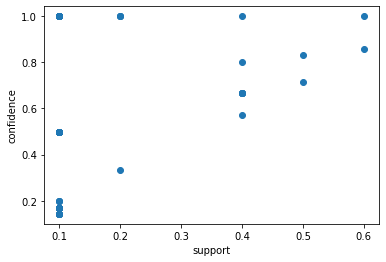

In [18]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()